In [ ]:
# # 코랩에서 한글 폰트를 사용하기 위한 과정

# # 1. 아래코드 실행하여 폰트 다운
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf

# # 2. 코랩의 런타임 다시시작(단축키:ctrl+M)
# # 3. 런타임 다시시작 완료했으면, 아래코드 실행

In [ ]:
pip install openpyxl==3.0.0

     |████████████████████████████████| 172 kB 12.5 MB/s 
  Created wheel for openpyxl: filename=openpyxl-3.0.0-py2.py3-none-any.whl size=241207 sha256=583cb0293c02a432fc0b8a7fbb6ad086c4dc94b0020c00487bb2ff769fecc7f7
  Stored in directory: /root/.cache/pip/wheels/c7/64/ff/ce98f6e1d2701ae8e216c875da62feed2839ac8a3cae0ab8af
Successfully built openpyxl
  Attempting uninstall: openpyxl
    Found existing installation: openpyxl 2.5.9
    Uninstalling openpyxl-2.5.9:
      Successfully uninstalled openpyxl-2.5.9


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
plt.style.use('seaborn')
sns.set(font='NanumBarunGothic', font_scale=2.5) 
# sns.set(font='Malgun Gothic', font_scale=2.5) 
plt.rcParams['axes.unicode_minus'] = False

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 데이터 전처리 및 Feature Engineering

### 데이터 불러오기 및 확인 후 사용할 컬럼 선정

In [ ]:
# 7개의 업종데이터를 불러온다
data1=pd.read_excel('/content/drive/Shareddrives/Junnesse 조(빅데이터 분석 경진대회(2차))/데이터셋/1. 관광숙박업.xlsx')
data2=pd.read_excel('/content/drive/Shareddrives/Junnesse 조(빅데이터 분석 경진대회(2차))/데이터셋/2. 관광펜션업.xlsx')
data3=pd.read_excel('/content/drive/Shareddrives/Junnesse 조(빅데이터 분석 경진대회(2차))/데이터셋/3. 숙박업.xlsx')
data4=pd.read_excel('/content/drive/Shareddrives/Junnesse 조(빅데이터 분석 경진대회(2차))/데이터셋/4. 외국인관광도시민박업.xlsx')
data5=pd.read_excel('/content/drive/Shareddrives/Junnesse 조(빅데이터 분석 경진대회(2차))/데이터셋/5. 자동차야영장업.xlsx')
data6=pd.read_excel('/content/drive/Shareddrives/Junnesse 조(빅데이터 분석 경진대회(2차))/데이터셋/6. 한옥체험업.xlsx')
data7=pd.read_excel('/content/drive/Shareddrives/Junnesse 조(빅데이터 분석 경진대회(2차))/데이터셋/7. 일반야영장업.xlsx')

In [ ]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3055 entries, 0 to 3054
Data columns (total 64 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   번호          3055 non-null   int64  
 1   개방서비스명      3055 non-null   object 
 2   개방서비스아이디    3055 non-null   object 
 3   개방자치단체코드    3055 non-null   int64  
 4   관리번호        3055 non-null   object 
 5   인허가일자       3055 non-null   int64  
 6   인허가취소일자     24 non-null     float64
 7   영업상태구분코드    3055 non-null   int64  
 8   영업상태명       3055 non-null   object 
 9   상세영업상태코드    3055 non-null   int64  
 10  상세영업상태명     3055 non-null   object 
 11  폐업일자        498 non-null    float64
 12  휴업시작일자      112 non-null    float64
 13  휴업종료일자      112 non-null    float64
 14  재개업일자       0 non-null      float64
 15  소재지전화       2064 non-null   object 
 16  소재지면적       0 non-null      float64
 17  소재지우편번호     1113 non-null   float64
 18  소재지전체주소     3055 non-null   object 
 19  도로명전체주소     2922 non-null  

In [ ]:
print(f'1. 관광숙박업 - {len(data1.columns)}개')
print(f'2. 관광펜션업 - {len(data2.columns)}개')
print(f'3. 숙박업 - {len(data3.columns)}개')
print(f'4. 외국인관광도시민박업 - {len(data4.columns)}개')
print(f'5. 자동차야영장업 - {len(data5.columns)}개')
print(f'6. 한옥체험업 - {len(data6.columns)}개')
print(f'7. 일반야영장업 - {len(data7.columns)}개')

1. 관광숙박업 - 64개
2. 관광펜션업 - 63개
3. 숙박업 - 50개
4. 외국인관광도시민박업 - 63개
5. 자동차야영장업 - 63개
6. 한옥체험업 - 63개
7. 일반야영장업 - 63개


In [ ]:
# 모든 업종데이터에 공통적으로 있는 컬럼 찾기
a = []
for i in data1.columns:
  if i in data2.columns:
    a.append(i)

b = []
for i in a:
  if (i in data3.columns) and (i in data4.columns) and (i in data5.columns) and (i in data6.columns) and (i in data7.columns):
    b.append(i)
print(f'중복된 컬럼 - {len(b)}개')
print('')
b

중복된 컬럼 - 29개



['번호',
 '개방서비스명',
 '개방서비스아이디',
 '개방자치단체코드',
 '관리번호',
 '인허가일자',
 '인허가취소일자',
 '영업상태구분코드',
 '영업상태명',
 '상세영업상태코드',
 '상세영업상태명',
 '폐업일자',
 '휴업시작일자',
 '휴업종료일자',
 '재개업일자',
 '소재지전화',
 '소재지면적',
 '소재지우편번호',
 '소재지전체주소',
 '도로명전체주소',
 '도로명우편번호',
 '사업장명',
 '최종수정시점',
 '데이터갱신구분',
 '데이터갱신일자',
 '업태구분명',
 '좌표정보(X)',
 '좌표정보(Y)',
 '좌석수']

In [ ]:
# 공통된 컬럼만 뽑은 업종데이터별 정보를 확인해 보자
x=[]
x.append([data1[b].info(), data2[b].info(), data3[b].info(), data4[b].info(), data5[b].info(), data6[b].info(), data7[b].info()])
x

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3055 entries, 0 to 3054
Data columns (total 29 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   번호        3055 non-null   int64  
 1   개방서비스명    3055 non-null   object 
 2   개방서비스아이디  3055 non-null   object 
 3   개방자치단체코드  3055 non-null   int64  
 4   관리번호      3055 non-null   object 
 5   인허가일자     3055 non-null   int64  
 6   인허가취소일자   24 non-null     float64
 7   영업상태구분코드  3055 non-null   int64  
 8   영업상태명     3055 non-null   object 
 9   상세영업상태코드  3055 non-null   int64  
 10  상세영업상태명   3055 non-null   object 
 11  폐업일자      498 non-null    float64
 12  휴업시작일자    112 non-null    float64
 13  휴업종료일자    112 non-null    float64
 14  재개업일자     0 non-null      float64
 15  소재지전화     2064 non-null   object 
 16  소재지면적     0 non-null      float64
 17  소재지우편번호   1113 non-null   float64
 18  소재지전체주소   3055 non-null   object 
 19  도로명전체주소   2922 non-null   object 
 20  도로명우편번호   2267 non-null   floa

[[None, None, None, None, None, None, None]]

In [ ]:
# 어느 한 업종데이터에서라도 정상값의 개수가 0인 컬럼을 제외하였음
# 이때 '휴업시작일자'컬럼, '소재지면적'컬럼과 '시설면적'컬럼이 제거 되었음 - 나중에 다시 추가할 컬럼

c=[]
for i in b:
  con = (0 != (int(data1[i].notnull().sum()))) and (0 != (int(data2[i].notnull().sum()))) and (0 != (int(data3[i].notnull().sum()))) and (0 != (int(data4[i].notnull().sum()))) and (0 != (int(data5[i].notnull().sum()))) and (0 != (int(data6[i].notnull().sum()))) and (0 != (int(data7[i].notnull().sum())))
  if con:
    c.append(i)

print(f'선택된 컬럼 - {len(c)}개')
print('')
c

선택된 컬럼 - 23개



['번호',
 '개방서비스명',
 '개방서비스아이디',
 '개방자치단체코드',
 '관리번호',
 '인허가일자',
 '영업상태구분코드',
 '영업상태명',
 '상세영업상태코드',
 '상세영업상태명',
 '폐업일자',
 '소재지전화',
 '소재지우편번호',
 '소재지전체주소',
 '도로명전체주소',
 '도로명우편번호',
 '사업장명',
 '최종수정시점',
 '데이터갱신구분',
 '데이터갱신일자',
 '좌표정보(X)',
 '좌표정보(Y)',
 '좌석수']

In [ ]:
# 선택된 컬럼만 뽑은 업종데이터별 정보를 확인해 보자
x=[]
x.append([data1[c].info(), data2[c].info(), data3[c].info(), data4[c].info(), data5[c].info(), data6[c].info(), data7[c].info()])
x

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3055 entries, 0 to 3054
Data columns (total 23 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   번호        3055 non-null   int64  
 1   개방서비스명    3055 non-null   object 
 2   개방서비스아이디  3055 non-null   object 
 3   개방자치단체코드  3055 non-null   int64  
 4   관리번호      3055 non-null   object 
 5   인허가일자     3055 non-null   int64  
 6   영업상태구분코드  3055 non-null   int64  
 7   영업상태명     3055 non-null   object 
 8   상세영업상태코드  3055 non-null   int64  
 9   상세영업상태명   3055 non-null   object 
 10  폐업일자      498 non-null    float64
 11  소재지전화     2064 non-null   object 
 12  소재지우편번호   1113 non-null   float64
 13  소재지전체주소   3055 non-null   object 
 14  도로명전체주소   2922 non-null   object 
 15  도로명우편번호   2267 non-null   float64
 16  사업장명      3055 non-null   object 
 17  최종수정시점    3055 non-null   int64  
 18  데이터갱신구분   3055 non-null   object 
 19  데이터갱신일자   3055 non-null   object 
 20  좌표정보(X)   2956 non-null   floa

[[None, None, None, None, None, None, None]]

In [ ]:
# 최종적으로 모든 데이터에 공통적으로 사용할 수 있는 컬럼은 아래 23개이다
c

['번호',
 '개방서비스명',
 '개방서비스아이디',
 '개방자치단체코드',
 '관리번호',
 '인허가일자',
 '영업상태구분코드',
 '영업상태명',
 '상세영업상태코드',
 '상세영업상태명',
 '폐업일자',
 '소재지전화',
 '소재지우편번호',
 '소재지전체주소',
 '도로명전체주소',
 '도로명우편번호',
 '사업장명',
 '최종수정시점',
 '데이터갱신구분',
 '데이터갱신일자',
 '좌표정보(X)',
 '좌표정보(Y)',
 '좌석수']

In [ ]:
# 위 컬럼중에서 필요한 컬럼만을 추출하였다.
# 추가로 위에서 제거했던 '휴업시작일자', '시설면적', 소재지면적'을 추가 하였다.

col = ['개방서비스명', '개방자치단체코드', '인허가일자', '영업상태구분코드', '폐업일자', '휴업시작일자', '사업장명', '좌표정보(X)', '좌표정보(Y)', '시설면적', '소재지면적']


### 선정된 11개컬럼을 기준으로 7개의 업종데이터를 결합

In [ ]:
# '3. 숙박업' 데이터에는 '시설면적' 데이터가 존재하지 않으므로 생성해준다.
data3['시설면적'] = np.nan

# 7개의 업종데이터 결합
dt = pd.concat([data1[col], data2[col], data3[col], data4[col], data5[col], data6[col], data7[col]],ignore_index=True)
dt

,개방서비스명,개방자치단체코드,인허가일자,영업상태구분코드,폐업일자,휴업시작일자,사업장명,좌표정보(X),좌표정보(Y),시설면적,소재지면적
0,관광숙박업,3000000,20201023,1,NaN,NaN,호텔 DM,201643.277883,452339.843126,2994.06,NaN
1,관광숙박업,3000000,20180618,3,20201008.0,NaN,JONGRO ALICE,199003.460155,452574.992954,278.43,NaN
2,관광숙박업,3000000,20191029,1,NaN,NaN,목시 서울 인사동 호텔,198988.983646,452223.097221,5971.04,NaN
3,관광숙박업,3000000,20191018,1,NaN,NaN,글루호텔,200280.218940,452611.575937,1843.53,NaN
4,관광숙박업,3000000,20191002,1,NaN,NaN,나인트리 프리미어 호텔 인사동,198498.918633,452473.403750,22134.77,NaN
...,...,...,...,...,...,...,...,...,...,...,...
67005,일반야영장업,6520000,20200603,1,NaN,NaN,붉은오름 자연휴양림 숲속 야영장,169313.905044,-11127.015467,193.46,NaN
67006,일반야영장업,6520000,20150522,1,NaN,NaN,햇살정원 제주캠핑민박,163423.196696,-28313.642298,1049.00,NaN
67007,일반야영장업,6520000,20160509,1,NaN,NaN,중문진실캠핑장,145722.769211,-26932.445735,0.00,NaN
67008,일반야영장업,6520000,20150727,1,NaN,NaN,서귀포자연휴양림야영장,149615.103624,-20459.431963,0.00,NaN


In [ ]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67010 entries, 0 to 67009
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   개방서비스명    67010 non-null  object 
 1   개방자치단체코드  67010 non-null  int64  
 2   인허가일자     67010 non-null  int64  
 3   영업상태구분코드  67010 non-null  int64  
 4   폐업일자      27421 non-null  float64
 5   휴업시작일자    345 non-null    float64
 6   사업장명      67010 non-null  object 
 7   좌표정보(X)   62694 non-null  float64
 8   좌표정보(Y)   62694 non-null  float64
 9   시설면적      10308 non-null  float64
 10  소재지면적     53611 non-null  object 
dtypes: float64(5), int64(3), object(3)
memory usage: 5.6+ MB


#### 컬럼 설명
##### 1. 개방서비스명
- 업종명
   
##### 2. 개방자치단체코드
- 인허가 신고를 접수한 기초자치단체(시군구)의 고유코드
- 코드설명은 '개방자치단체코드목록(참고).xlsx'참고
   
##### 3. 인허가일자
- 인허가 신고 일자
   
##### 4. 영업상태구분코드
- 2022년 01월 02일 기준 영업상태를 의미
- 01:영업/정상, 02:휴업, 03:폐업, 04:취소/말소/만료/정지/중지, 05:제외/삭제/전출
- '3. 숙박업':01,03 
- '5. 자동차야영장업':01,02,03,04,05
- 나머지:01,02,03,04
   
##### 5. 폐업일자
- 폐업 신고 일자
   
##### 6. 휴업시작일자
- 휴업 시작 신고 일자
   
##### 7. 사업장명
- 업소명
   
##### 8. 좌표정보(X), 좌표정보(Y)
- 좌표 정보(X, Y)는 중부원점TM(EPSG:2097)좌표계로 주소코드정보(PNU)에 해당하는 값을 매핑하여 제공한다고 LOCALDATA에서 명시  
- 하지만 실제로 좌표를 확인해보니 중부원점TM(EPSG:5174)를 따름

##### 9. 시설면적, 소재지면적
- 총 운영 면적을 나타낸 데이터로 단위는 미터제곱이다.
- 시설면적과 소재지면적 데이터의 판단기준은 동일하다.

### '소재지면적' 컬럼과 '시설면적' 컬럼을 합쳐 '면적' 컬럼 만들기
- '3. 숙박업' 업종데이터의 '소재지면적' 컬럼과 나머지 업종데이터들의 '시설면적' 컬럼은 동일한 측정기준의 컬럼이다.  
- 이 두 컬럼을 '면적'이라는 컬럼으로 통일하여 사용할 것이다.  

In [ ]:
# '소재지면적'컬럼의 데이터 타입을 실수형으로 변경
dt.소재지면적 = dt.소재지면적.str.replace(',','').astype(float)

# 소재지면적과 시설면적의 데이터를 모아 면적 컬럼을 만들었다.
con1 = dt['소재지면적'].notnull()
dt.loc[con1, '면적'] = dt.loc[con1, '소재지면적']
con2 = dt['시설면적'].notnull()
dt.loc[con2, '면적'] = dt.loc[con2, '시설면적']

# 기존 소재지면적과 시설면적 컬럼을 제거
dt.drop(['시설면적', '소재지면적'], axis=1, inplace=True)

dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67010 entries, 0 to 67009
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   개방서비스명    67010 non-null  object 
 1   개방자치단체코드  67010 non-null  int64  
 2   인허가일자     67010 non-null  int64  
 3   영업상태구분코드  67010 non-null  int64  
 4   폐업일자      27421 non-null  float64
 5   휴업시작일자    345 non-null    float64
 6   사업장명      67010 non-null  object 
 7   좌표정보(X)   62694 non-null  float64
 8   좌표정보(Y)   62694 non-null  float64
 9   면적        63919 non-null  float64
dtypes: float64(5), int64(3), object(2)
memory usage: 5.1+ MB


### 각 컬럼의 데이터 타입 처리

In [ ]:
# 데이터 타입 처리
change = {'개방자치단체코드':'str', '영업상태구분코드':'str', '인허가일자':'str', '폐업일자':'str', '휴업시작일자':'str'}
dt = dt.astype(change)
dt['폐업일자'] = dt['폐업일자'].str.replace('\.0','')
dt['휴업시작일자'] = dt['휴업시작일자'].str.replace('\.0','')
dt[dt == 'nan'] = np.nan
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67010 entries, 0 to 67009
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   개방서비스명    67010 non-null  object 
 1   개방자치단체코드  67010 non-null  object 
 2   인허가일자     67010 non-null  object 
 3   영업상태구분코드  67010 non-null  object 
 4   폐업일자      27421 non-null  object 
 5   휴업시작일자    345 non-null    object 
 6   사업장명      67010 non-null  object 
 7   좌표정보(X)   62694 non-null  float64
 8   좌표정보(Y)   62694 non-null  float64
 9   면적        63919 non-null  float64
dtypes: float64(3), object(7)
memory usage: 5.1+ MB


In [ ]:
# 인허가일자, 폐업일자, 휴업시작일자 들을 datetime타입으로 바꾸자

# 인허가일자, 폐업일자에 간간히 잘못된 형식의 값들이 들어가 있음
# 먼저 인허가일자에 잘못된 형식
print('-'*100)
print('인허가일자 컬럼의 잘못된 형식의 데이터들')
print()
con1 = pd.to_datetime(dt.loc[:,'인허가일자'],format='%Y%m%d', errors='coerce').isnull()
print(dt[con1]['인허가일자'].value_counts())
print()
# 폐업일자에 잘못된 형식
print('-'*100)
print('폐업일자 컬럼의 잘못된 형식의 데이터들')
print()
con2 = pd.to_datetime(dt.loc[:,'폐업일자'],format='%Y%m%d', errors='coerce').isnull()
print(dt[con2]['폐업일자'].value_counts())
print()
# 휴업시작일자에 잘못된 형식은 없음
print('-'*100)
print('휴업시작일자 컬럼의 잘못된 형식의 데이터들 - 없음')
print()
con3 = pd.to_datetime(dt.loc[:,'휴업시작일자'],format='%Y%m%d', errors='coerce').isnull()
print(dt[con3]['휴업시작일자'].value_counts())
print()
print('-'*100)

# 잘못된 형식의 날짜 데이터들이 모두 2003년도 이전의 데이터이고 극소수이므로 제거한다.
dt1 = (dt.loc[((con2&dt.loc[:,'폐업일자'].notnull()) | (con1&dt.loc[:,'인허가일자'].notnull()))==False]).copy()

# 3개의 일자컬럽들을 datetime 형식으로 변경
dt1.loc[:, '인허가일자'] = pd.to_datetime(dt1.loc[:,'인허가일자'],format='%Y%m%d', errors='raise')
dt1.loc[:, '폐업일자'] = pd.to_datetime(dt1.loc[:, '폐업일자'],format='%Y%m%d', errors='raise')
dt1.loc[:, '휴업시작일자'] = pd.to_datetime(dt1.loc[:,'휴업시작일자'],format='%Y%m%d', errors='raise')

dt1.info()

----------------------------------------------------------------------------------------------------
인허가일자 컬럼의 잘못된 형식의 데이터들

19750229    1
19840431    1
19970230    1
19940431    1
Name: 인허가일자, dtype: int64

----------------------------------------------------------------------------------------------------
폐업일자 컬럼의 잘못된 형식의 데이터들

200009      1
200204      1
200003      1
2014        1
199909      1
20020231    1
20020230    1
Name: 폐업일자, dtype: int64

----------------------------------------------------------------------------------------------------
휴업시작일자 컬럼의 잘못된 형식의 데이터들 - 없음

Series([], Name: 휴업시작일자, dtype: int64)

----------------------------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 66999 entries, 0 to 67009
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   개방서비스명    66999 non-null  object        
 1   개방자치단체코드  66999 non-

### 폐업과 휴업 합치기
영업상태 중에서 폐업과 휴업은 자명하게 자의적인 정지 신청을 한다는 특성을 가졌고,  
휴업시작일자의 수가 345개로 전체데이터의 0.5%를 차지할 뿐 이므로,  
폐업과 휴업 컬럼은 자의적으로 정지시킨다는 부분에서 같은 의미의 데이터로 보아  
폐업일자와 휴업시작일자를 합치기로 하였다.

In [ ]:
dt = dt1.copy()

# 휴업시작일자와 폐업일자가 동시에 존재하는 데이터가 있는지 확인한다.
# 아래와 같이 휴업을 시작하였으나 결국은 폐업을 한 업체가 존재한다.
print('----------------------휴업을 시작하였으나 결국은 폐업을 한 업체 리스트----------------------')
print()
dt[(dt['휴업시작일자'].notnull()) & (dt['폐업일자'].notnull())]

----------------------휴업을 시작하였으나 결국은 폐업을 한 업체 리스트----------------------



,개방서비스명,개방자치단체코드,인허가일자,영업상태구분코드,폐업일자,휴업시작일자,사업장명,좌표정보(X),좌표정보(Y),면적
62306,한옥체험업,3110000,2017-07-24,2,2021-12-31,2020-04-21,"은평한옥""학산루""",194720.000000,459942.000000,NaN
62471,한옥체험업,4200000,2012-03-09,2,2020-11-30,2019-10-25,경복궁펜션,359985.501634,488213.956122,NaN
62887,한옥체험업,4690000,2010-08-03,2,2021-10-14,2021-04-14,전일희 고택,180031.886278,238522.783386,76.00
63170,한옥체험업,4910000,2015-03-19,2,2021-11-12,2021-01-12,장흥존재고택,195358.456730,116799.060733,NaN
63515,한옥체험업,5070000,2015-11-26,2,2020-12-31,2016-09-22,학여제,366559.228478,338665.184667,NaN
63516,한옥체험업,5070000,2010-01-28,2,2016-12-31,2014-10-22,디딜방아민박,335888.771651,338596.492175,32.76
63707,한옥체험업,5090000,2012-11-20,2,2018-12-31,2016-10-04,덕산고택,351578.542327,368452.196806,NaN
63719,한옥체험업,5110000,2014-05-09,2,2021-12-31,2021-01-01,양진당,310237.277766,318841.642202,NaN
63927,한옥체험업,5450000,2010-05-11,2,2022-01-14,2018-01-02,신안면 박우식 고가,290427.765790,207978.355556,NaN
63968,한옥체험업,5680000,2010-11-08,2,2022-01-05,2019-01-06,벽송재,167493.974200,369263.265045,0.00


In [ ]:
# 위와 같은 경우의 데이터들의 영업상태구분코드를 폐업인 3 으로 변경한다.
id = dt[(dt['휴업시작일자'].notnull()) & (dt['폐업일자'].notnull())].index
dt.iloc[id, 3] = dt.iloc[id, 3].str.replace('2','3')

In [ ]:
# 폐휴업일자와 휴업시작일자 컬럼 합치기

# 폐휴업일자 컬럼을 만들어 폐업일자의 데이터를 넣는다.
dt['폐휴업일자'] = dt['폐업일자']

# 폐휴업일자 컬럼에 휴업시작일자 데이터가 존재하면서 폐업일자가 존재하지 않는 휴업시작일자 데이터를 넣는다
con = (dt['휴업시작일자'].notnull()) & (dt['폐업일자'].isnull())
dt.loc[con, '폐휴업일자'] = dt.loc[con, '휴업시작일자']

# 폐업일자와 휴업시작일자를 제거한다.
dt.drop(['폐업일자', '휴업시작일자'], axis=1, inplace=True)

dt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 66999 entries, 0 to 67009
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   개방서비스명    66999 non-null  object        
 1   개방자치단체코드  66999 non-null  object        
 2   인허가일자     66999 non-null  datetime64[ns]
 3   영업상태구분코드  66999 non-null  object        
 4   사업장명      66999 non-null  object        
 5   좌표정보(X)   62684 non-null  float64       
 6   좌표정보(Y)   62684 non-null  float64       
 7   면적        63908 non-null  float64       
 8   폐휴업일자     27747 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(3), object(4)
memory usage: 5.1+ MB


### '개방자치단체코드' 컬럼으로 '시군구명' 컬럼과 '시도명'컬럼 생성하기
- LOCALDATA에서 제공하는 '개방자치단체코드목록(참고).xlsx' 데이터 활용

In [ ]:
# LOCALDATA에서 제공하는 '개방자치단체코드목록(참고).xlsx' 불러오기
code = pd.read_excel('/content/drive/Shareddrives/Junnesse 조(빅데이터 분석 경진대회(2차))/데이터셋/개방자치단체코드목록(참고).xlsx')
print(code.info())
code
# '시군구명'와 '시군구(자치단체)코드' 컬럼에 결측치가 한개 존재하는 것에 주목

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230 entries, 0 to 229
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   번호           230 non-null    int64  
 1   시도명          17 non-null     object 
 2   시도(자치단체)코드   17 non-null     float64
 3   시군구명         229 non-null    object 
 4   시군구(자치단체)코드  229 non-null    float64
dtypes: float64(2), int64(1), object(2)
memory usage: 9.1+ KB
None


,번호,시도명,시도(자치단체)코드,시군구명,시군구(자치단체)코드
0,1,서울특별시,6110000.0,종로구,3000000.0
1,2,NaN,NaN,중구,3010000.0
2,3,NaN,NaN,용산구,3020000.0
3,4,NaN,NaN,성동구,3030000.0
4,5,NaN,NaN,광진구,3040000.0
...,...,...,...,...,...
225,226,NaN,NaN,거창군,5470000.0
226,227,NaN,NaN,합천군,5480000.0
227,228,NaN,NaN,창원시,5670000.0
228,229,제주특별자치도,6500000.0,제주시,6510000.0


In [ ]:
# '시군구명'와 '시군구(자치단체)코드' 컬럼의 결측치 확인
code[code['시군구(자치단체)코드'].isna()]

,번호,시도명,시도(자치단체)코드,시군구명,시군구(자치단체)코드
74,75,세종특별자치시,5690000.0,NaN,NaN


In [ ]:
# '시군구명'와 '시군구(자치단체)코드' 컬럼의 결측치 처리
con = code['시군구(자치단체)코드'].isna()
code.loc[con, ['시군구명','시군구(자치단체)코드']] = code.loc[con, ['시도명', '시도(자치단체)코드']].values
code[con]

,번호,시도명,시도(자치단체)코드,시군구명,시군구(자치단체)코드
74,75,세종특별자치시,5690000.0,세종특별자치시,5690000.0


In [ ]:
# 시도명'와 '시도(자치단체)코드' 컬럼의 결측치 처리
code.fillna(method='ffill', inplace=True)

# 필요한 컬럼만 고르기
col = ['시도명', '시군구명', '시군구(자치단체)코드']
code = code.loc[:,col]
code.rename(columns={'시군구(자치단체)코드':'개방자치단체코드'}, inplace=True)
code.loc[:,'개방자치단체코드'] = code.loc[:,'개방자치단체코드'].astype('int').astype('str')
print(code.info())
code

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230 entries, 0 to 229
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   시도명       230 non-null    object
 1   시군구명      230 non-null    object
 2   개방자치단체코드  230 non-null    object
dtypes: object(3)
memory usage: 5.5+ KB
None


,시도명,시군구명,개방자치단체코드
0,서울특별시,종로구,3000000
1,서울특별시,중구,3010000
2,서울특별시,용산구,3020000
3,서울특별시,성동구,3030000
4,서울특별시,광진구,3040000
...,...,...,...
225,경상남도,거창군,5470000
226,경상남도,합천군,5480000
227,경상남도,창원시,5670000
228,제주특별자치도,제주시,6510000


In [ ]:
# 인허가데이터와 개방자치단체코드목록 데이터 병합하기
dt = pd.merge(left = code,
                       right = dt,
                       how = 'right',
                       left_on = '개방자치단체코드',
                       right_on = '개방자치단체코드')
dt

,시도명,시군구명,개방자치단체코드,개방서비스명,인허가일자,영업상태구분코드,사업장명,좌표정보(X),좌표정보(Y),면적,폐휴업일자
0,서울특별시,종로구,3000000,관광숙박업,2020-10-23,1,호텔 DM,201643.277883,452339.843126,2994.06,NaT
1,서울특별시,종로구,3000000,관광숙박업,2018-06-18,3,JONGRO ALICE,199003.460155,452574.992954,278.43,2020-10-08
2,서울특별시,종로구,3000000,관광숙박업,2019-10-29,1,목시 서울 인사동 호텔,198988.983646,452223.097221,5971.04,NaT
3,서울특별시,종로구,3000000,관광숙박업,2019-10-18,1,글루호텔,200280.218940,452611.575937,1843.53,NaT
4,서울특별시,종로구,3000000,관광숙박업,2019-10-02,1,나인트리 프리미어 호텔 인사동,198498.918633,452473.403750,22134.77,NaT
...,...,...,...,...,...,...,...,...,...,...,...
66994,제주특별자치도,서귀포시,6520000,일반야영장업,2020-06-03,1,붉은오름 자연휴양림 숲속 야영장,169313.905044,-11127.015467,193.46,NaT
66995,제주특별자치도,서귀포시,6520000,일반야영장업,2015-05-22,1,햇살정원 제주캠핑민박,163423.196696,-28313.642298,1049.00,NaT
66996,제주특별자치도,서귀포시,6520000,일반야영장업,2016-05-09,1,중문진실캠핑장,145722.769211,-26932.445735,0.00,NaT
66997,제주특별자치도,서귀포시,6520000,일반야영장업,2015-07-27,1,서귀포자연휴양림야영장,149615.103624,-20459.431963,0.00,NaT


### '좌표정보(X)'와 '좌표정보(Y)' 컬럼의 EDA와 데이터 전처리 및 Feature Engineering

#### '좌표정보(X)'와 '좌표정보(Y)' 컬럼의 결측치 처리

In [ ]:
dt[['좌표정보(X)', '좌표정보(Y)']].info()
print('-'*100)
print('결측치 개수 - %s 개'%(dt['좌표정보(X)'].isna().sum()))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 66999 entries, 0 to 66998
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   좌표정보(X)  62684 non-null  float64
 1   좌표정보(Y)  62684 non-null  float64
dtypes: float64(2)
memory usage: 1.5 MB
----------------------------------------------------------------------------------------------------
결측치 개수 - 4315 개


좌표정보가 결측치인 데이터들은  
어떤 업종에 속해 있는 경우가 많을까?  
또 영업상태는 어떨까?  

영업상태의 비율에 주목해보자



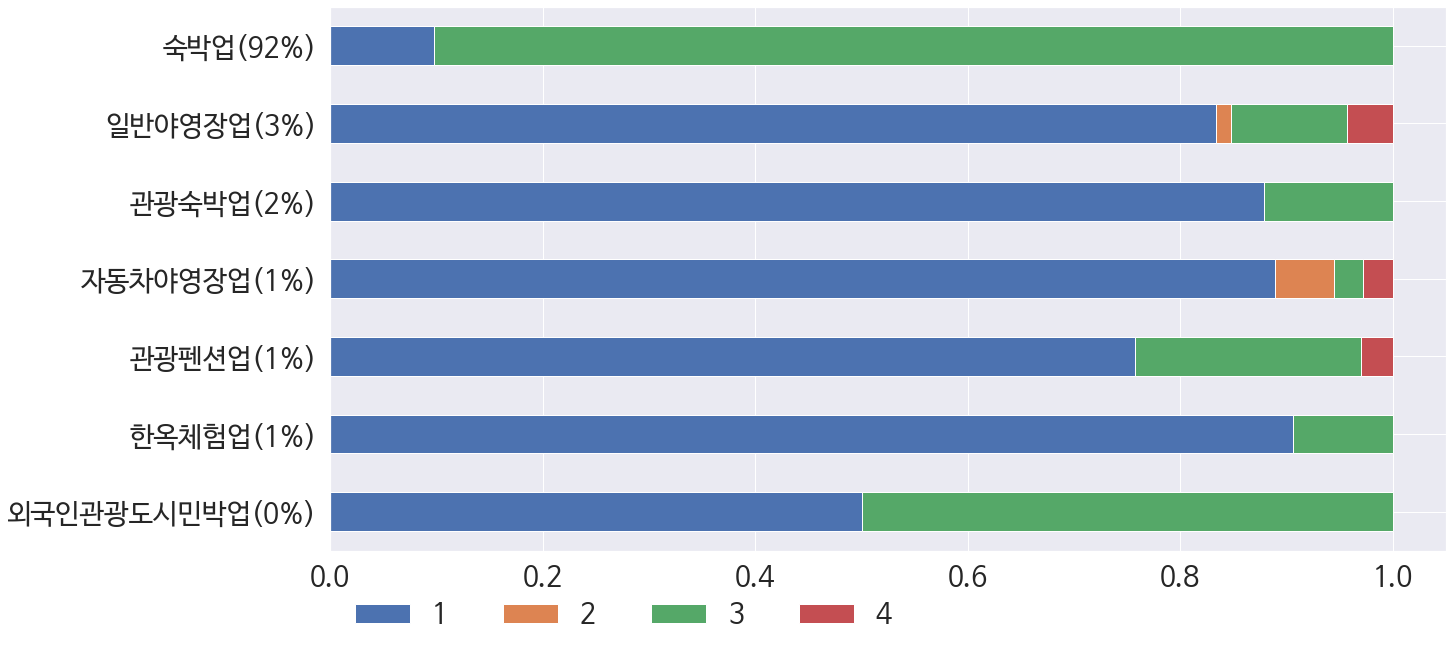

In [ ]:
txt1 = dt[dt['좌표정보(X)'].isnull()]

서비스명영업상태 = pd.pivot_table(txt1, index=['개방서비스명'],  columns=['영업상태구분코드'], aggfunc='count')['사업장명']
# 서비스명 = pd.pivot_table(last, index=['개방서비스명'], values=['영업상태구분코드'], aggfunc='count')['영업상태구분코드']
서비스명 = txt1.개방서비스명.value_counts(ascending=True)

print('영업상태의 비율에 주목해보자')
print()
# 업소 수가 적은 서비스 부터 내림차순으로 인덱싱
index = 서비스명.index

a = 서비스명영업상태.loc[index].apply(lambda x: x/서비스명, axis=0)

a.plot.barh(stacked=True, figsize=(20,10))
plt.legend(loc='center left', bbox_to_anchor=(0, -0.12), ncol=4)

# xticks 포매팅
per = 서비스명/서비스명.sum()
z = zip(per.index, per.values)
plt.yticks(range(len(index)), ["{0}({1:.0f}%)".format(x,y*100) for x,y in z])

plt.show()

In [ ]:
# 좌표정보의 결측치의 유무를 0과 1로 인코딩하여 '좌표결측'컬럼 생성
dt.loc[dt['좌표정보(X)'].isnull(), '좌표결측'] = 0
dt.loc[dt['좌표정보(X)'].notnull(), '좌표결측'] = 1
dt.좌표결측.value_counts()

1.0    62684
0.0     4315
Name: 좌표결측, dtype: int64

In [ ]:
# 좌표정보 컬럼의 결측치 채우기
# 좌표정보 컬럼의 결측치를 시군구 지역을 의미하는 '개방자치단체코드'를 기준으로 나누어 각 지역의 좌표정보 데이터들의 평균값으로 처리한다.

a = pd.pivot_table(dt[dt['좌표정보(X)'].notnull()], index = ['개방자치단체코드'], values = '좌표정보(X)', aggfunc = 'mean')
for i in a.index:
  x = (dt.개방자치단체코드 == i) & (dt['좌표정보(X)'].isna())
  dt.loc[x, '좌표정보(X)'] = a.loc[i, '좌표정보(X)']

b = pd.pivot_table(dt[dt['좌표정보(Y)'].notnull()], index = ['개방자치단체코드'], values = '좌표정보(Y)', aggfunc = 'mean')
for i in b.index:
  x = (dt.개방자치단체코드 == i) & (dt['좌표정보(Y)'].isna())
  dt.loc[x, '좌표정보(Y)'] = b.loc[i, '좌표정보(Y)']

last = dt.copy()

last.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 66999 entries, 0 to 66998
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   시도명       66999 non-null  object        
 1   시군구명      66999 non-null  object        
 2   개방자치단체코드  66999 non-null  object        
 3   개방서비스명    66999 non-null  object        
 4   인허가일자     66999 non-null  datetime64[ns]
 5   영업상태구분코드  66999 non-null  object        
 6   사업장명      66999 non-null  object        
 7   좌표정보(X)   66999 non-null  float64       
 8   좌표정보(Y)   66999 non-null  float64       
 9   면적        63908 non-null  float64       
 10  폐휴업일자     27747 non-null  datetime64[ns]
 11  좌표결측      66999 non-null  float64       
dtypes: datetime64[ns](2), float64(4), object(6)
memory usage: 6.6+ MB


#### 좌표계 변환  
##### 좌표정보(X), 좌표정보(Y)
- 좌표 정보(X, Y)는 중부원점TM(EPSG:2097)좌표계로 주소코드정보(PNU)에 해당하는 값을 매핑하여 제공한다고 LOCALDATA에서 명시
- 하지만 실제로 좌표를 확인해보니 중부원점TM(EPSG:5174)를 따름

##### 일반적인 위도, 경도 좌표계인 중부원점TM(EPSG:4326)으로 좌표계 변환

In [ ]:
pip install pyproj

     |████████████████████████████████| 6.3 MB 14.4 MB/s 


In [ ]:
import pyproj
# 좌표계를 변환해주는 함수 정의
def project_array(coord, p1_type, p2_type):
    p1 = pyproj.Proj(init=p1_type)
    p2 = pyproj.Proj(init=p2_type)
    fx, fy = pyproj.transform(p1, p2, coord[:,0], coord[:,1])
    return np.dstack([fx, fy])[0]

# DataFrame -> NumPy Array 변환
coord = np.array(dt[['좌표정보(X)','좌표정보(Y)']])
coord

# 좌표계 정보 설정
p1_type = "epsg:5174"
p2_type = "epsg:4326"

# project_array() 함수 실행
result = project_array(coord, p1_type, p2_type)
result

array([[127.01938965,  37.57334839],
       [126.9895067 ,  37.5754678 ],
       [126.98934334,  37.57229724],
       ...,
       [126.41836959,  33.25223151],
       [126.45977652,  33.31078045],
       [126.25594929,  33.21166965]])

In [ ]:
last['경도'] = result[:, 0]
last['위도'] = result[:, 1]
last = last.drop(columns=['좌표정보(X)','좌표정보(Y)'])
last

,시도명,시군구명,개방자치단체코드,개방서비스명,인허가일자,영업상태구분코드,사업장명,면적,폐휴업일자,좌표결측,경도,위도
0,서울특별시,종로구,3000000,관광숙박업,2020-10-23,1,호텔 DM,2994.06,NaT,1.0,127.019390,37.573348
1,서울특별시,종로구,3000000,관광숙박업,2018-06-18,3,JONGRO ALICE,278.43,2020-10-08,1.0,126.989507,37.575468
2,서울특별시,종로구,3000000,관광숙박업,2019-10-29,1,목시 서울 인사동 호텔,5971.04,NaT,1.0,126.989343,37.572297
3,서울특별시,종로구,3000000,관광숙박업,2019-10-18,1,글루호텔,1843.53,NaT,1.0,127.003960,37.575798
4,서울특별시,종로구,3000000,관광숙박업,2019-10-02,1,나인트리 프리미어 호텔 인사동,22134.77,NaT,1.0,126.983795,37.574552
...,...,...,...,...,...,...,...,...,...,...,...,...
66994,제주특별자치도,서귀포시,6520000,일반야영장업,2020-06-03,1,붉은오름 자연휴양림 숲속 야영장,193.46,NaT,1.0,126.670985,33.395664
66995,제주특별자치도,서귀포시,6520000,일반야영장업,2015-05-22,1,햇살정원 제주캠핑민박,1049.00,NaT,1.0,126.608365,33.240524
66996,제주특별자치도,서귀포시,6520000,일반야영장업,2016-05-09,1,중문진실캠핑장,0.00,NaT,1.0,126.418370,33.252232
66997,제주특별자치도,서귀포시,6520000,일반야영장업,2015-07-27,1,서귀포자연휴양림야영장,0.00,NaT,1.0,126.459777,33.310780


In [ ]:
pip install folium # folium 라이브러리 불러오기

In [ ]:
# 좌표계가 올바르게 바뀌어 졌는지 확인

import folium

# 데이터 100개 랜덤 추출
sample = last.sample(n=100)

# 지도 중심 좌표 설정
lat_c, lon_c = 37.53165351203043, 126.9974246490573

# Folium 지도 객체 생성
m = folium.Map(location=[lat_c, lon_c], zoom_start=8)

# 마커 생성
for _, row in sample.iterrows():
    lat, lon = row['위도'], row['경도']
    tool = row['사업장명']
    folium.Marker(location=[lat, lon], tooltip=tool).add_to(m)
    
m

### '개방자치단체코드'컬럼을 '지역'컬럼으로 대체 생성

In [ ]:
last.loc[:,'지역'] = last.시도명 + ' ' + last.시군구명
last

,시도명,시군구명,개방자치단체코드,개방서비스명,인허가일자,영업상태구분코드,사업장명,면적,폐휴업일자,좌표결측,경도,위도,지역
0,서울특별시,종로구,3000000,관광숙박업,2020-10-23,1,호텔 DM,2994.06,NaT,1.0,127.019390,37.573348,서울특별시 종로구
1,서울특별시,종로구,3000000,관광숙박업,2018-06-18,3,JONGRO ALICE,278.43,2020-10-08,1.0,126.989507,37.575468,서울특별시 종로구
2,서울특별시,종로구,3000000,관광숙박업,2019-10-29,1,목시 서울 인사동 호텔,5971.04,NaT,1.0,126.989343,37.572297,서울특별시 종로구
3,서울특별시,종로구,3000000,관광숙박업,2019-10-18,1,글루호텔,1843.53,NaT,1.0,127.003960,37.575798,서울특별시 종로구
4,서울특별시,종로구,3000000,관광숙박업,2019-10-02,1,나인트리 프리미어 호텔 인사동,22134.77,NaT,1.0,126.983795,37.574552,서울특별시 종로구
...,...,...,...,...,...,...,...,...,...,...,...,...,...
66994,제주특별자치도,서귀포시,6520000,일반야영장업,2020-06-03,1,붉은오름 자연휴양림 숲속 야영장,193.46,NaT,1.0,126.670985,33.395664,제주특별자치도 서귀포시
66995,제주특별자치도,서귀포시,6520000,일반야영장업,2015-05-22,1,햇살정원 제주캠핑민박,1049.00,NaT,1.0,126.608365,33.240524,제주특별자치도 서귀포시
66996,제주특별자치도,서귀포시,6520000,일반야영장업,2016-05-09,1,중문진실캠핑장,0.00,NaT,1.0,126.418370,33.252232,제주특별자치도 서귀포시
66997,제주특별자치도,서귀포시,6520000,일반야영장업,2015-07-27,1,서귀포자연휴양림야영장,0.00,NaT,1.0,126.459777,33.310780,제주특별자치도 서귀포시


In [ ]:
last.to_csv("/content/drive/Shareddrives/Junnesse 조(빅데이터 분석 경진대회(2차))/데이터셋/last(new).csv", index=False)

In [ ]:
# pip install -U pandas-profiling

In [ ]:
# import pandas_profiling
# dt.profile_report().to_file('/content/drive/Shareddrives/Junnesse/EDA.html')